### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [252]:
data = pd.read_csv("C:\\Users\\ajit2\\Desktop\\Berkley Course\\From Berkley\\Module 5\\Practical Assignment\\data\\coupons.csv")

In [253]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [254]:
data.shape # Looking the dimensions of data

(12684, 26)

In [255]:
data.info()# Column car has only 108 (0.85% )non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [256]:
data.isna().sum() # data not available in other Columns are between 1-2% and hence not removed

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [257]:
#dropping car column as it has too many null values
data.drop('car', inplace=True, axis=1)

In [258]:
data.describe(include='all') # checking descriptive statistics and making sure the car column is dropped

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.000000,12684,12684,12684,12684,12684,12684,...,12467,12533,12554,12495,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,NaN,5,5,2,2,8,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,NaN,3230,3996,7091,6511,2653,5100,...,3385,4672,5376,6077,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.301798,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,19.154486,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


4. What proportion of the total observations chose to accept the coupon? 



In [259]:
x=round(data.Y.mean(),2)
print(f"The proportion of the total that chose to acccept coupons is: {x}")

The proportion of the total that chose to acccept coupons is: 0.57


5. Use a bar plot to visualize the `coupon` column.

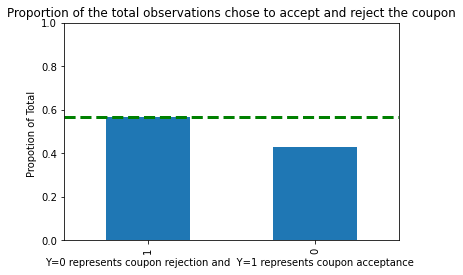

In [260]:
#visualize the coupon column
data.Y.value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Y=0 represents coupon rejection and  Y=1 represents coupon acceptance ")
plt.ylabel("Propotion of Total ")
plt.title("Proportion of the total observations chose to accept and reject the coupon")
plt.ylim(0,1)
plt.axhline(data.Y.mean(), color='g', linestyle='dashed', linewidth=3);


6. Use a histogram to visualize the temperature column.

In [265]:
#For visualize the temperature column
fig = px.histogram(data,x="temperature",title="Histogram showing Proportion accepting coupon by temperature",
                   labels={"temperature": "temperature"}, color = "Y" ,histnorm="probability",
                   color_discrete_sequence = px.colors.qualitative.Set2)
fig.update_layout(width=600, height=400)
fig

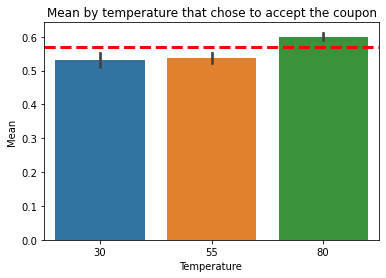

In [266]:
#data.groupby(['temperature']).Y.mean().plot(kind="bar",stacked=True)
sns.barplot(x ='temperature',y='Y', data=data)
plt.axhline(data.Y.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xlabel("Temperature ")
plt.ylabel("Mean")
plt.title("Mean by temperature that chose to accept the coupon");

#### Graphs above show that more coupons were accepted at 80

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [268]:
dfbar=data[data['coupon']=='Bar']
dfbar.shape

(2017, 25)

2. What proportion of bar coupons were accepted?


In [269]:
x=round(dfbar.Y.mean(),2)
print(f"The proportion of bar coupons that were accepted: {x}")

The proportion of bar coupons that were accepted: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [270]:
dfbar.Bar.value_counts(normalize=True)# checking the frequency of visit to the bar

never    0.415832
less1    0.285571
1~3      0.198898
4~8      0.075150
gt8      0.024549
Name: Bar, dtype: float64

In [272]:
#analysis Comparing the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more
Bar_list3ormore=['4~8','gt8']
Bar_list3orless=['never','less1','1~3','']#blanks we included with less than 3 -has only21 records soshould not skew results
dfbar3ormore=dfbar.query('Bar in @Bar_list3ormore')
dfbar3orless=dfbar.query('Bar in @Bar_list3orless')
proportion3orless=(dfbar3orless.Y.mean())
proportion3ormore=(dfbar3ormore.Y.mean())
print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {proportion3orless}")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {proportion3ormore}")

Acceptance rate for those who went to a bar 3 or fewer times a month: 0.37061769616026713
Acceptance rate for those who went to a bar more than 3 times a month: 0.7688442211055276


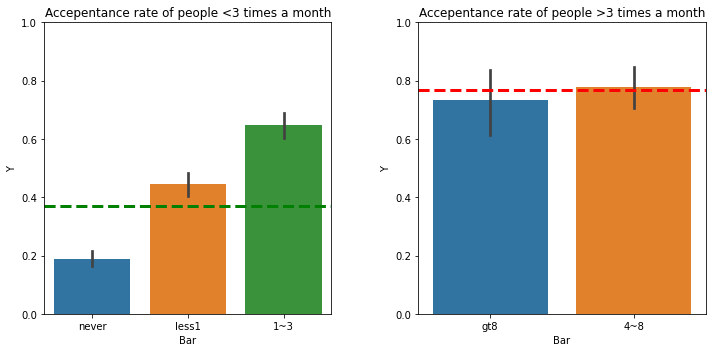

In [273]:
#sub plots
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.ylim(0,1)
#dfbar3orless.groupby(['Bar']).Y.mean().plot(kind="bar")
sns.barplot(x ='Bar',y='Y', data=dfbar3orless)
plt.axhline(dfbar3orless.Y.mean(), color='g', linestyle='dashed', linewidth=3)
plt.title("Accepentance rate of people <3 times a month")

plt.subplot(1,2,2)
plt.ylim(0,1)
#dfbar3ormore.groupby(['Bar']).Y.mean().plot(kind="bar")
sns.barplot(x ='Bar',y='Y', data=dfbar3ormore)
plt.axhline(dfbar3ormore.Y.mean(), color='r', linestyle='dashed', linewidth=3)
plt.title("Accepentance rate of people >3 times a month")
plt.tight_layout(h_pad=2, w_pad=5)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [274]:
dfbar.age.value_counts(normalize=True)# checking unique Age values

21         0.206743
26         0.195835
31         0.168071
50plus     0.140307
36         0.103619
41         0.088250
46         0.054041
below21    0.043133
Name: age, dtype: float64

In [275]:
#analysis
#creating a dataframe for people with age more than 25 and visits bar more than once
Age_list25ormore=['26','31','36','41','46','50plus']
Bar_list1ormore=['1~3','4~8','gt8']
dfbarandage1=dfbar.query('age in @Age_list25ormore and Bar in @Bar_list1ormore')
acceptancemorethan25and1bar=dfbarandage1.Y.mean()
Age_list25orless=['21','below21']
Bar_list1orless=['never','less1','']
dfbarandage2=dfbar.query('age in @Age_list25orless and Bar in @Bar_list1orless')
acceptancelessthan25and1bar=dfbarandage2.Y.mean()
print(f"Acceptance rate for above 25 and more than one bar visit: {acceptancemorethan25and1bar}")
print(f"Acceptance rate for below 25 and less than one month: {acceptancelessthan25and1bar}")

Acceptance rate for above 25 and more than one bar visit: 0.6952380952380952
Acceptance rate for below 25 and less than one month: 0.3944954128440367


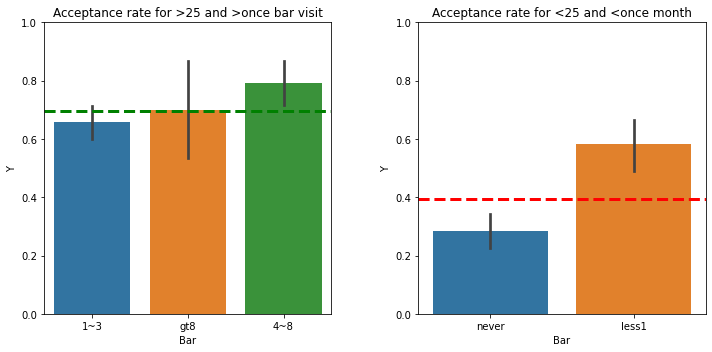

In [276]:
#sub plots
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.ylim(0,1)
#dfbarandage1.groupby(['Bar','age']).Y.mean().plot(kind="bar")
sns.barplot(x ='Bar',y='Y', data=dfbarandage1)
plt.axhline(dfbarandage1.Y.mean(), color='g', linestyle='dashed', linewidth=3)
plt.title("Acceptance rate for >25 and >once bar visit")

plt.subplot(1,2,2)
plt.ylim(0,1)
#dfbarandage2.groupby(['Bar','age']).Y.mean().plot(kind="bar")
sns.barplot(x ='Bar',y='Y', data=dfbarandage2)
plt.axhline(dfbarandage2.Y.mean(), color='r', linestyle='dashed', linewidth=3)
plt.title("Acceptance rate for <25 and <once month")
plt.tight_layout(h_pad=2, w_pad=5)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [277]:
dfbar.occupation.value_counts(normalize=True)# checking unique occupation values

Unemployed                                   0.149232
Student                                      0.124442
Computer & Mathematical                      0.115022
Sales & Related                              0.088250
Education&Training&Library                   0.069410
Management                                   0.058999
Office & Administrative Support              0.052058
Arts Design Entertainment Sports & Media     0.049579
Business & Financial                         0.044125
Retired                                      0.037184
Food Preparation & Serving Related           0.023798
Community & Social Services                  0.021815
Healthcare Support                           0.021815
Healthcare Practitioners & Technical         0.020327
Transportation & Material Moving             0.017353
Legal                                        0.016857
Architecture & Engineering                   0.013386
Personal Care & Service                      0.013386
Protective Service          

In [278]:
dfbar.passanger.value_counts(normalize=True)# checking unique passenger values

Alone        0.594943
Friend(s)    0.167080
Partner      0.135845
Kid(s)       0.102132
Name: passanger, dtype: float64

In [279]:
#creating a dataframe for drivers per conditions listed above
Bar_list1ormore=['1~3','4~8','gt8']
dfbarpassangerandoccupation1=dfbar.query('Bar in @Bar_list1ormore and occupation!="Farming Fishing & Forestry" and passanger!="Kid(s)"')
acceptbarpassangerandoccupation1=dfbarpassangerandoccupation1.Y.mean()
Bar_list1orless=['never','less1','']
dfbarpassangerandoccupation2=dfbar.query('Bar in @Bar_list1orless and occupation=="Farming Fishing & Forestry" and passanger=="Kid(s)"')
acceptbarpassangerandoccupation2=dfbarpassangerandoccupation2.Y.mean()
print(f"Acceptance rate for >1Bar,!Kid and !Farming Fishing & Forestry: {acceptbarpassangerandoccupation1}")
print(f"Acceptance rate for <1Bar,having Kid and working in Farming Fishing & Forestry: {acceptbarpassangerandoccupation2}")

Acceptance rate for >1Bar,!Kid and !Farming Fishing & Forestry: 0.7132486388384754
Acceptance rate for <1Bar,having Kid and working in Farming Fishing & Forestry: 0.3333333333333333


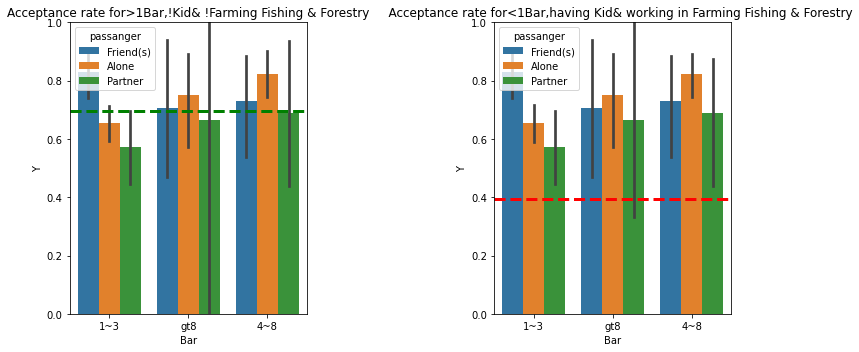

In [280]:
#sub plots
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.ylim(0,1)
sns.barplot(x ='Bar',y='Y', data=dfbarpassangerandoccupation1,hue='passanger')
plt.axhline(dfbarandage1.Y.mean(), color='g', linestyle='dashed', linewidth=3)
plt.title("Acceptance rate for>1Bar,!Kid& !Farming Fishing & Forestry")

plt.subplot(1,2,2)
plt.ylim(0,1)
sns.barplot(x ='Bar',y='Y', data=dfbarpassangerandoccupation1,hue='passanger')
plt.axhline(dfbarandage2.Y.mean(), color='r', linestyle='dashed', linewidth=3)
plt.title("    Acceptance rate for<1Bar,having Kid& working in Farming Fishing & Forestry")
plt.tight_layout(h_pad=2, w_pad=15)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [281]:
Bar_listn=['1~3','4~8','gt8']
Income_listn=['Less than $12500','$12500 - $24999 ','$25000 - $37499','$37500 - $49999']
Restaurant_listn=['4~8','gt8']
passanger_listn=['Alone','Friend(s)','Partner']
maritalstatus_listn=['Divorced','Married partner','Single','Unmarried partner']
age_listn=Age_listn=['below21','21','26']
#Group1=go to bars more than once a month, had passengers that were not a kid, and were not widowed
Group1=dfbar.query('Bar in @Bar_listn and passanger in @passanger_listn and maritalStatus in @maritalstatus_listn')
Group1_acceptance_rate=round(Group1.Y.mean(),2)
# Group2=go to bars more than once a month and are under the age of 30
Group2=dfbar.query('Bar in @Bar_listn and age in @age_listn')
Group2_acceptance_rate=round(Group2.Y.mean(),2)
#Group3=go to cheap restaurants more than 4 times a month and income is less than 50K
Group3=dfbar.query('income in @Income_listn and RestaurantLessThan20 in @Restaurant_listn')
Group3_acceptance_rate=round(Group3.Y.mean(),2)
print(f"Group1=go to bars more than once a month, had passengers that were not a kid, and were not widowed,Acceptance Rate: {Group1_acceptance_rate}")
print(f"Group2=go to bars more than once a month and are under the age of 30,Acceptance Rate:: {Group2_acceptance_rate}")
print(f"Group3=go to cheap restaurants more than 4 times a month and income is less than 50K,Acceptance Rate: {Group3_acceptance_rate}")

Group1=go to bars more than once a month, had passengers that were not a kid, and were not widowed,Acceptance Rate: 0.71
Group2=go to bars more than once a month and are under the age of 30,Acceptance Rate:: 0.72
Group3=go to cheap restaurants more than 4 times a month and income is less than 50K,Acceptance Rate: 0.46


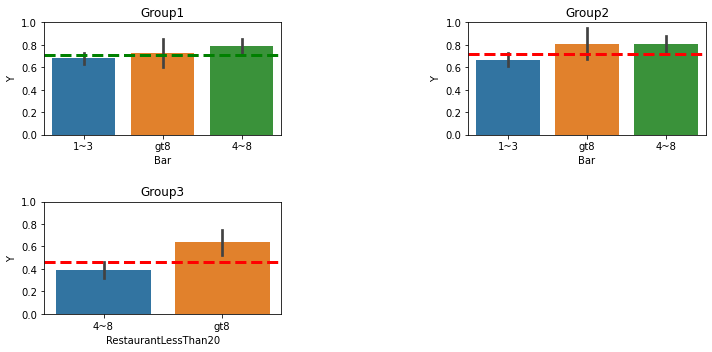

In [282]:
#sub plots
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.ylim(0,1)
sns.barplot(x ='Bar',y='Y', data=Group1)
plt.axhline(Group1.Y.mean(), color='g', linestyle='dashed', linewidth=3)
plt.title("Group1")

plt.subplot(2,2,2)
plt.ylim(0,1)
sns.barplot(x ='Bar',y='Y', data=Group2)
plt.axhline(Group2.Y.mean(), color='r', linestyle='dashed', linewidth=3)
plt.title("Group2")
plt.tight_layout(h_pad=2, w_pad=15)

plt.subplot(2,2,3)
plt.ylim(0,1)
sns.barplot(x ='RestaurantLessThan20',y='Y', data=Group3)
plt.axhline(Group3.Y.mean(), color='r', linestyle='dashed', linewidth=3)
plt.title("Group3")
plt.tight_layout(h_pad=2, w_pad=15)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### Overall  the mean acceptantance for coupons were 57%  however the mean was  41% of bar coupons . This shows some other coupons types had higher acceptance
#### Bar coupons with following attributes higher acceptance:
#### -People who Visited bar more than 3 times a month
#### -People above 25 and have more than one bar visit per month
#### -People having more than one Bar per month,having no Kids and not have Farming Fishing & Forestry as occupation
#### -People who did no have passengers that were not a kid  and were not widowed


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

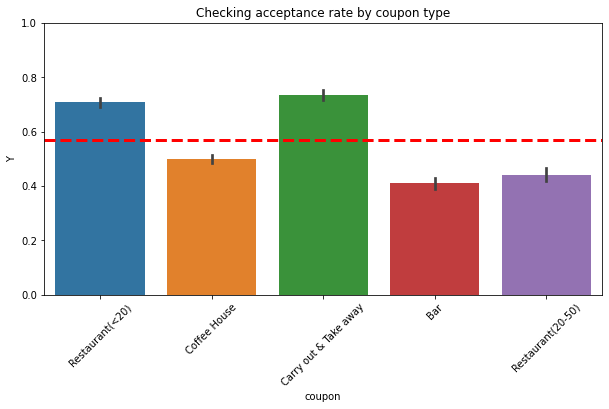

In [283]:
# investigating by coupon type shows that Carry out and Take away has the higest mean acceptance
plt.figure(figsize=(10,5))
plt.ylim(0,1)
sns.barplot(x ='coupon',y='Y', data=data)
plt.axhline(data.Y.mean(), color='r', linestyle='dashed', linewidth=3)
plt.title("Checking acceptance rate by coupon type")
plt.xticks(rotation=45);

## Based on above Will try to determine the characteristics of passengers who accept the carry out and Take away coupons.

In [284]:
# Creating a new data frame for analysis
dfcarry_take=data[data['coupon']=='Carry out & Take away']
dfcarry_take.shape

(2393, 25)

## Extracting relevant information to generate sub plots

In [285]:
dfcarry_take.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [286]:
feature=['destination', 'passanger', 'weather', 'temperature', 'time',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education','Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp']

In [287]:
list(enumerate(feature))

[(0, 'destination'),
 (1, 'passanger'),
 (2, 'weather'),
 (3, 'temperature'),
 (4, 'time'),
 (5, 'expiration'),
 (6, 'gender'),
 (7, 'age'),
 (8, 'maritalStatus'),
 (9, 'has_children'),
 (10, 'education'),
 (11, 'Bar'),
 (12, 'CoffeeHouse'),
 (13, 'CarryAway'),
 (14, 'RestaurantLessThan20'),
 (15, 'Restaurant20To50'),
 (16, 'toCoupon_GEQ5min'),
 (17, 'toCoupon_GEQ15min'),
 (18, 'toCoupon_GEQ25min'),
 (19, 'direction_same'),
 (20, 'direction_opp')]

## Generating relevant sub plots for the carry out and take away coupon

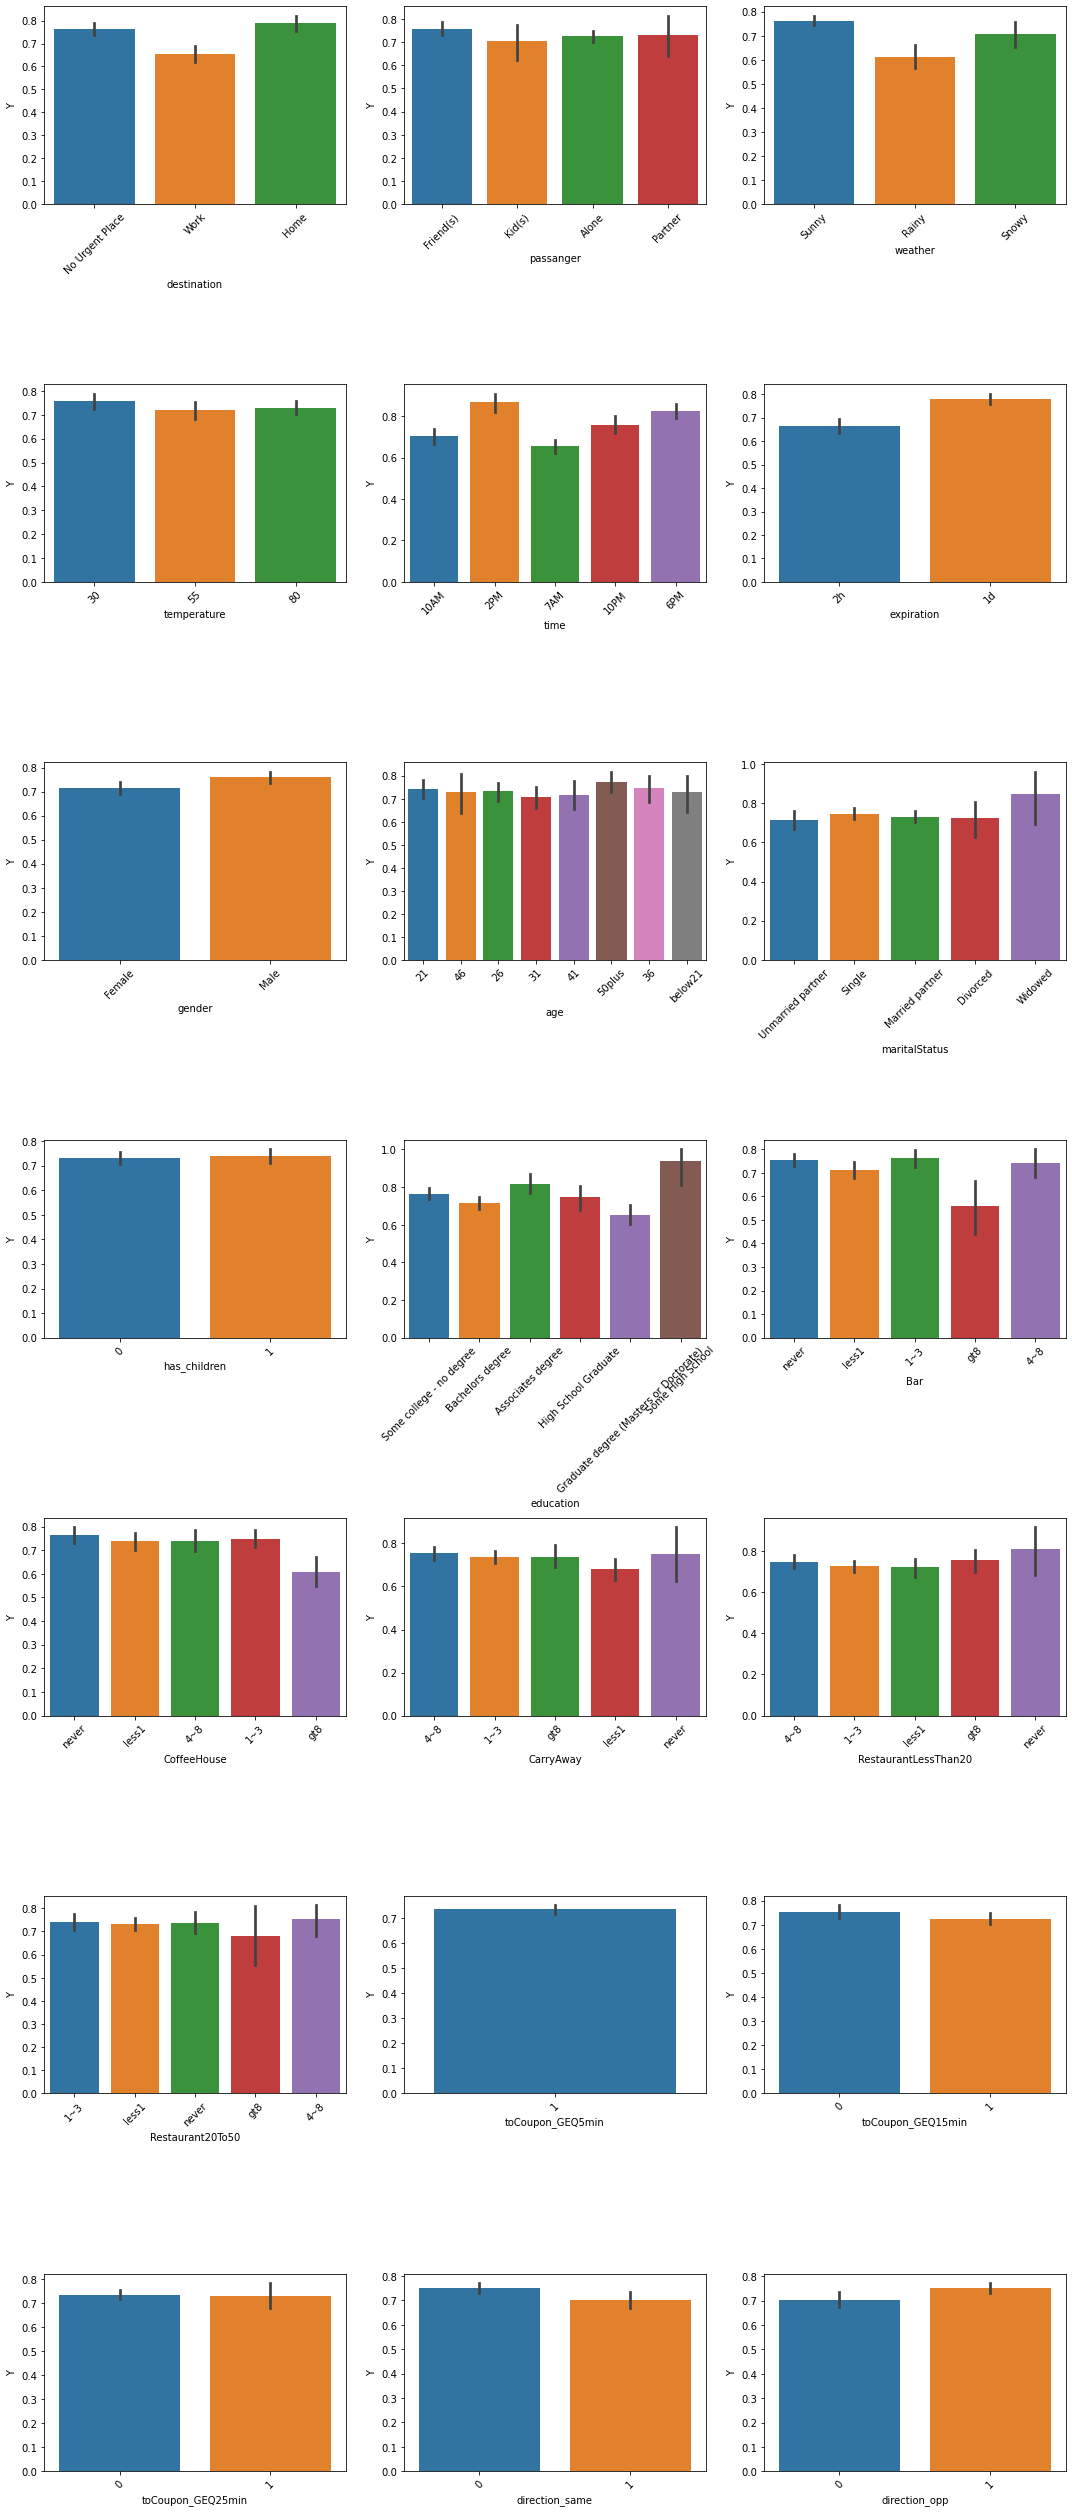

In [288]:
plt.figure(figsize=(15,35))
for i in enumerate(feature):
        plt.subplot(7,3,i[0]+1)
        fig=sns.barplot(x=i[1],y="Y",data=dfcarry_take)
        plt.xticks(rotation=45)
        plt.tight_layout(h_pad=1)

## Overall the mean acceptantance for coupons were 57% however the mean for Carry out & Take away is  73% of bar coupons.
### Carry and Take away coupons with following attributes had higher acceptance:
### Passenger who did not have work as a destination
### with friend(s) and Partner as passengar
### Weather is sunny
### Temperature is 30
### Time is 2PM
### Expirration is 1d
### Age is 50Plus
### Marital Staus is widowed
### Has some high school degree
### Direction_opp is 1


### Occupationwise the above data is given below
### This shows that passengers with following occupation will have higher acceptance rate
#### Building & Grounds Cleaning & Maintenance
#### Protective Service
#### Construction & Extraction
#### Healthcare Practitioners & Technical
#### Healthcare Support

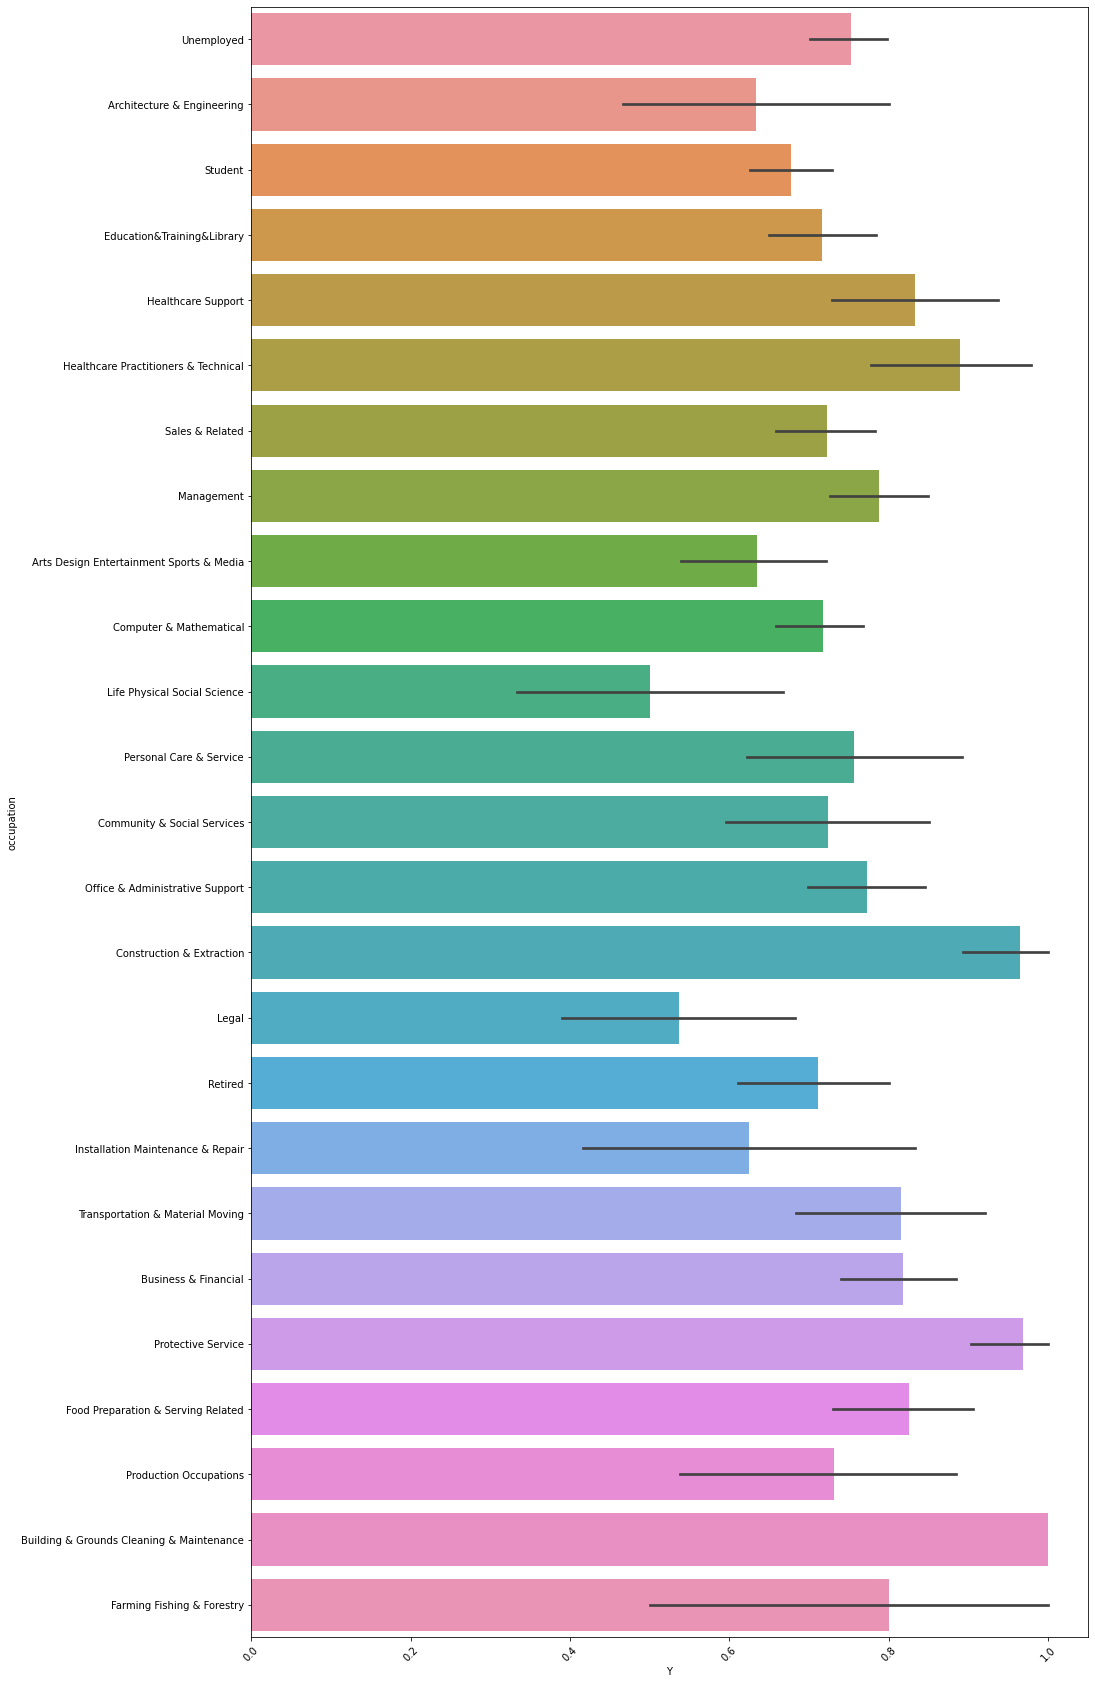

In [289]:
plt.figure(figsize=(15,30));
sns.barplot(x="Y",y="occupation",data=dfcarry_take);
plt.xticks(rotation=45);